## Importing Needed Libraries

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

import re

import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [10]:
df = pd.read_csv('C:\\Users\\pc\\Documents\\GitHub\\CODINGSAMURAI\\Task2\\HousingPrices-Amsterdam-August-2021.csv',thousands=r',',index_col=0)
df.head()

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


## Exploring The Dataset

In [11]:
# Print the dataset shape
df.shape

(924, 7)

In [12]:
# Print the dataset info to check the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB


In [13]:
# Print the Describe of the data to check if there are outliers
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


**Here we can notice that there are outliers in the Area and Room columns**

In [14]:
# Check null values
df.isnull().sum()

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [15]:
# Check duplicates
df.duplicated().sum()

1

## Cleaning The Data

In [16]:
# Drop null values
df.dropna(inplace=True)

In [17]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [18]:
# Delete unneeded columns
df.drop(columns=['Address', 'Zip'], axis=1, inplace=True)

In [19]:
# list each of Categorical and Numerical columns
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

In [20]:
# Dealing with outliers
for col in numerical_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

## EDA

In [21]:
# Define a function to visualize the numerical columns
def num_cols_vis(col):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

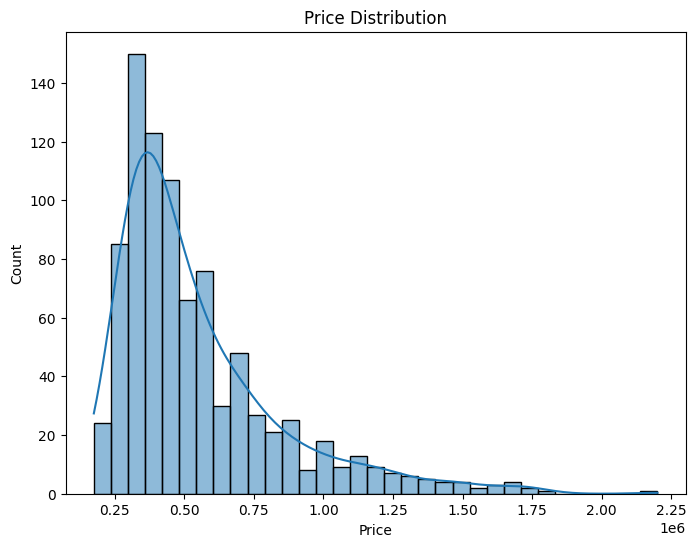

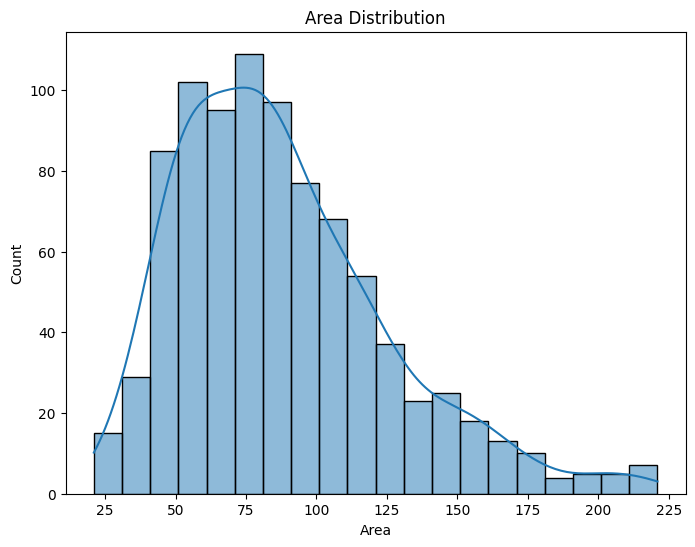

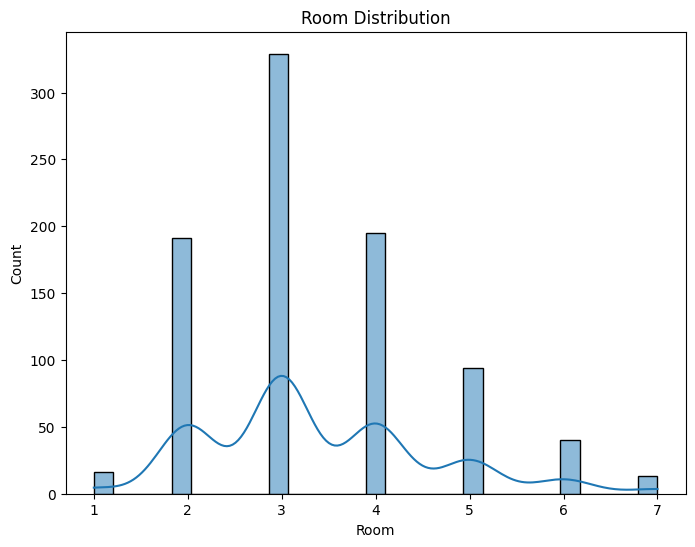

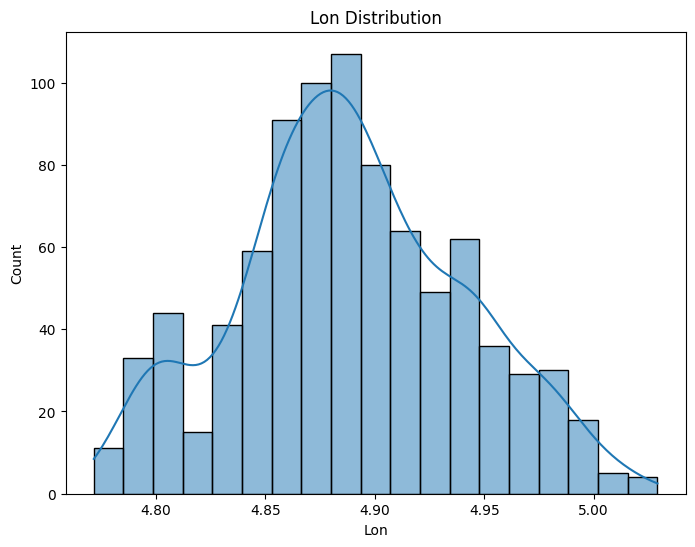

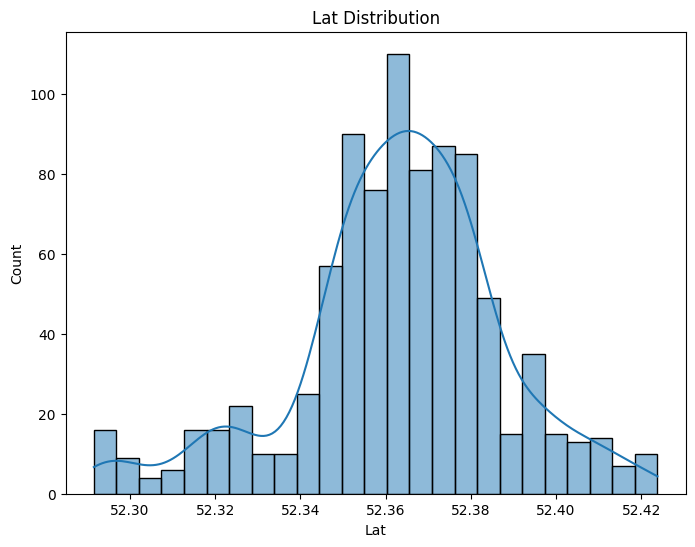

In [22]:
# Call the previous function
for col in numerical_columns:
    num_cols_vis(col)

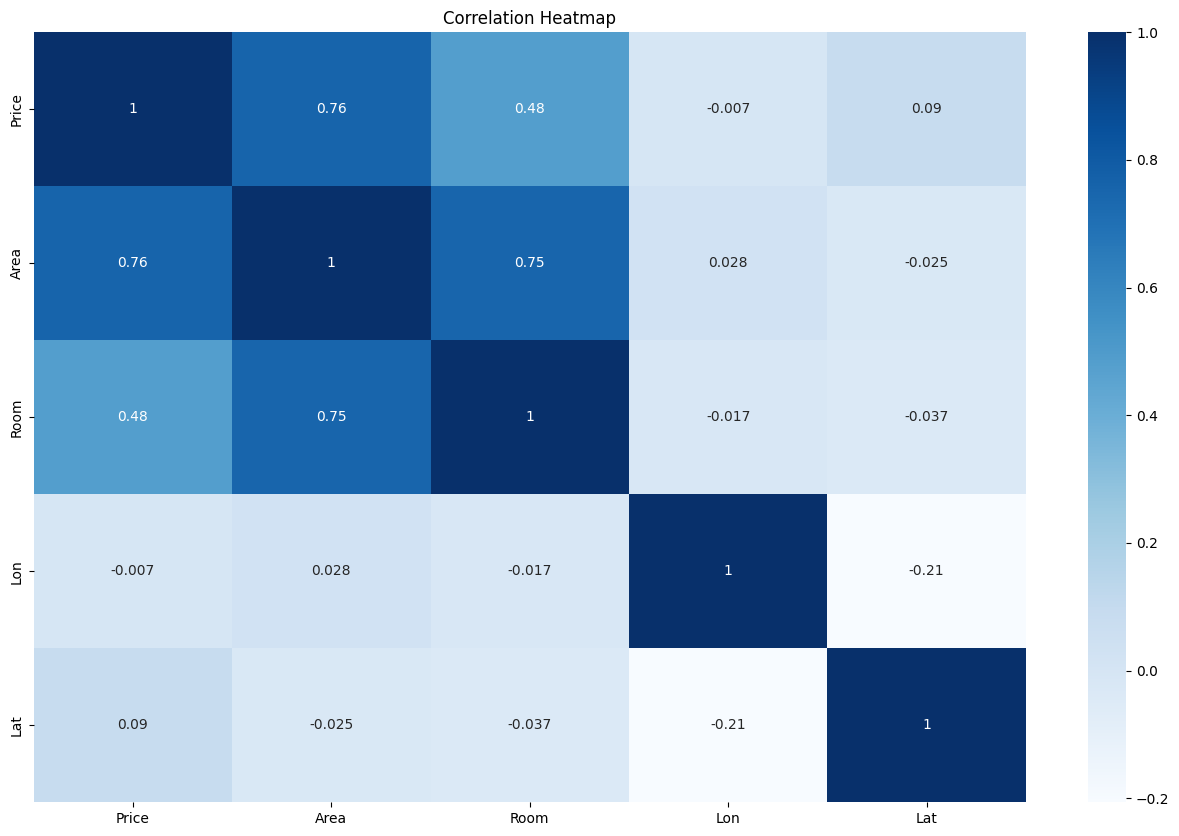

In [23]:
# Display the correlation matrix to find the relationship between each column and the target column
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

## Spliting The Data

In [24]:
X = df.drop(['Price'], axis=1) 
y = df['Price']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the resulting datasets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("Training target variable size:", len(y_train))
print("Testing target variable size:", len(y_test))

Training set size: 702
Testing set size: 176
Training target variable size: 702
Testing target variable size: 176


## Building The Models

**Here um gonna use two models, the first one is xgboost and the second one is random forest**

In [26]:
# Define and Train Models
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Prediction && Evaluation

In [27]:
# Predictions
rf_predictions = rf.predict(X_test)
xgb_predictions = xgb.predict(X_test)

# Evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

print("Random Forest MSE:", rf_mse)
print("XGBoost MSE:", xgb_mse)

Random Forest MSE: 12628848453.112555
XGBoost MSE: 12823546423.540821


## Models Tuning

In [28]:
# Random Forest Hyperparameter Tuning
# Grid of parameters to tune
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=rf_params,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1)

rf_grid.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", np.sqrt(-rf_grid.best_score_))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 138974.7844996747


In [29]:
# XGBoost Hyperparameter Tuning
# Grid of parameters to tune
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# GridSearchCV
xgb_grid = GridSearchCV(estimator=XGBRegressor(random_state=42),
                        param_grid=xgb_params,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        verbose=1)

xgb_grid.fit(X_train, y_train)
print("Best parameters for XGBoost:", xgb_grid.best_params_)
print("Best score for XGBoost:", np.sqrt(-xgb_grid.best_score_))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}
Best score for XGBoost: 141239.54528688826
